LECTURA DE DATOS

In [1]:
import pandas
import numpy
#Tras realizar los imports de pandas y nunpy que necesitaremos, usamos el método read_csv para leer nuestro csv.El parámetro
#skiprow=1 nos sirve para saltarnos la primera línea que son el nombre de las columnas.
quakers = pandas.read_csv('quakers_nodelist.csv', skiprows=1, header=None,
                       names=['name', 'historical_significance', 'gender', 'birthdate',
                              'deathdate', 'id'])

In [2]:
quakers

,name,historical_significance,gender,birthdate,deathdate,id
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [3]:
# 10 primeras filas
quakers.head(10)

,name,historical_significance,gender,birthdate,deathdate,id
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
5,William Mucklow,religious writer,male,1630,1713,10008595
6,Thomas Salthouse,Quaker preacher and writer,male,1630,1691,10010643
7,William Dewsbury,Quaker activist,male,1621,1688,10003478
8,John Audland,Quaker preacher,male,1630,1664,10000411
9,Richard Claridge,Quaker minister and schoolmaster,male,1649,1723,10002469


GRAFO

In [4]:
#Creamos un grafo vacío
import networkx as nx
G=nx.Graph()

In [5]:
#Leemos el fichero
df = pandas.read_csv('quakers_edgelist.csv')

In [6]:
#Definimos cada una de las partes de la que se compone el fichero y lo dividimos en fuente y destino.
df1 = df[['Source', 'Target']]

In [7]:
#Formamos el grafo
G = nx.from_pandas_edgelist(df1, 'Source', 'Target')

In [8]:
#Nos aseguramos que los datos corresponden con lo que se imprime por pantalla
G.number_of_edges()

174

In [9]:
G.number_of_nodes()

119

In [10]:
#Como vemos tenemos 119 nodos y 174 aristas.

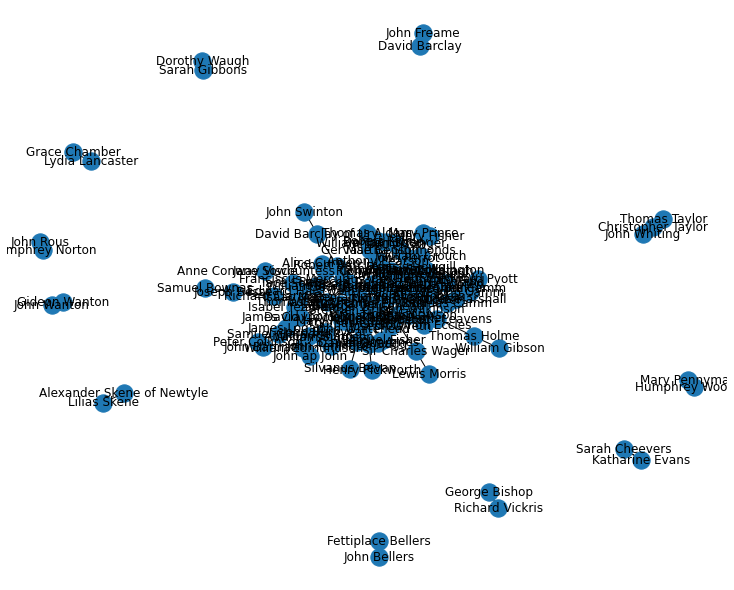

In [11]:
#Aquí está la representaciñon del grafo.
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_spring(G, with_labels=True)

MÉTODO KNN

In [12]:
from sklearn import preprocessing

atributos = quakers.loc[:, 'birthdate':'deathdate']  # selección de las columnas de atributos
objetivo = quakers['gender']  # selección de la columna objetivo

In [13]:
from sklearn import model_selection
from sklearn import neighbors
#Primero creamos un diccionario vacío al que llamaremos cv_score_kNN que será donde se almacene nuestro resultado
cv_scores_kNN = {}
for k in range(1,11):
    #Obtenemos el clasificador necesario para el método KNN y le pasamos los numeros del 1,10 con el for anterior
    clasif_kNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')
    #Le aplicamos la validación cruzada
    cv_scores = model_selection.cross_val_score(clasif_kNN,
                                                atributos,
                                                objetivo,
                                               cv=10)
    cv_scores_kNN[k] = cv_scores.mean()
#El socore nos devuelve el accuracy, es decir la exactitud.
print(cv_scores_kNN)
#De los métodos que nos devuelven escogemos el mayor y que nos devuelva su índice.
print(max(cv_scores_kNN, key=cv_scores_kNN.get))

{1: 0.696969696969697, 2: 0.6303030303030304, 3: 0.7568181818181818, 4: 0.7318181818181817, 5: 0.7818181818181819, 6: 0.7818181818181819, 7: 0.8151515151515152, 8: 0.7984848484848486, 9: 0.8151515151515152, 10: 0.8151515151515152}
7


In [14]:
#Seleccionamos el valor máximo que hemos obtenido anteriormente
clasif_kNN = neighbors.KNeighborsClassifier(n_neighbors=7, metric='hamming')
#Le pasamos fit para codificar o decodificar los datos
clasif_kNN.fit(atributos,objetivo)
#Por último obtenemos la exactitud correspondiente
clasif_kNN.score(atributos, objetivo)

0.8235294117647058

In [15]:
print("%0.2f accuracy" % (cv_scores.mean()))

0.82 accuracy


Relaciones

In [16]:
import networkx as nx
cn = nx.degree_centrality(G)

In [17]:
cl = nx.clustering(G)

In [18]:
# print(cm)
bc = nx.betweenness_centrality(G)

In [19]:
gr = G.degree

In [20]:
quakers_relacional = pandas.read_csv('quakers_nodelist.csv', skiprows=1, header=None,
                       names=['name', 'historical_significance', 'gender', 'birthdate',
                              'deathdate', 'id'])

In [21]:
quakers_relacional['degree']= quakers_relacional['name'].map(gr)
quakers_relacional['centrality']= quakers_relacional['name'].map(cn)
quakers_relacional['clustering']= quakers_relacional['name'].map(cl)
quakers_relacional['bcentrality']= quakers_relacional['name'].map(bc)

In [22]:
#Creamos otro modelo añadiendole los atributos relaccionalers grado, centralidad y clustering
#Con los métodos .map le pasamos los diccionarios obtenidos para añdirlo al modelo relacional
quakers_relacional

,name,historical_significance,gender,birthdate,deathdate,id,degree,centrality,clustering,bcentrality
0,Joseph Wyeth,religious writer,male,1663,1731,10013191,1,0.008475,0.000000,0.000000
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149,1,0.008475,0.000000,0.000000
2,James Logan,colonial official and scholar,male,1674,1751,10007567,4,0.033898,0.333333,0.026945
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983,1,0.008475,0.000000,0.000000
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152,1,0.008475,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945,8,0.067797,0.178571,0.046191
115,William Simpson,Quaker preacher,male,1627,1671,10011114,1,0.008475,0.000000,0.000000
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390,1,0.008475,0.000000,0.000000
117,John Perrot,Quaker schismatic,male,1555,1665,10009584,7,0.059322,0.333333,0.028296


In [23]:
from sklearn import preprocessing

atributos_relacional = quakers_relacional.loc[:, 'birthdate':'bcentrality']  # selección de las columnas de atributos
objetivo_relacional = quakers_relacional['gender']  # selección de la columna objetivo

In [24]:
#Hacemos lo mismo que hemos hecho anteriormente pero con el modelo relacional
from sklearn import model_selection
from sklearn import neighbors
cv_scores_kNN_relacional = {}
for k in range(1,11):
    clasif_kNN_relacional = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')
    cv_scores_relacional= model_selection.cross_val_score(clasif_kNN,
                                                atributos_relacional,
                                                objetivo_relacional,
                                               cv=10)
    cv_scores_kNN_relacional[k] = cv_scores_relacional.mean()
print(cv_scores_kNN_relacional)
print(max(cv_scores_kNN_relacional, key=cv_scores_kNN_relacional.get))

{1: 0.8151515151515152, 2: 0.8151515151515152, 3: 0.8151515151515152, 4: 0.8151515151515152, 5: 0.8151515151515152, 6: 0.8151515151515152, 7: 0.8151515151515152, 8: 0.8151515151515152, 9: 0.8151515151515152, 10: 0.8151515151515152}
1


In [25]:
clasif_kNN_relacional = neighbors.KNeighborsClassifier(n_neighbors=1, metric='hamming')
clasif_kNN_relacional.fit(atributos_relacional,objetivo_relacional)
clasif_kNN_relacional.score(atributos_relacional, objetivo_relacional)

1.0

In [26]:
#Una vez obtenida la exactitud en ambos modelos hemos visto que ha aumentado, por tanto podemos concluir que el modelo 
#añadiendo las propiedades relacionales mejora el rendimiento.

ÁRBOLES DE DECISIÓN

In [27]:
from sklearn import tree
#Creamos el clasificador necesario para el árbol de desición y le aplicamos fit para codificar o decodificar los atributos y el
#objetivo.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(atributos, objetivo)

[Text(244.125, 208.38, 'X[1] <= 1706.0\ngini = 0.301\nsamples = 119\nvalue = [22, 97]'),
 Text(187.78846153846152, 190.26, 'X[0] <= 1655.5\ngini = 0.382\nsamples = 74\nvalue = [19, 55]'),
 Text(179.20384615384614, 172.14, 'X[1] <= 1700.5\ngini = 0.361\nsamples = 72\nvalue = [17, 55]'),
 Text(126.62307692307692, 154.01999999999998, 'X[0] <= 1624.5\ngini = 0.32\nsamples = 65\nvalue = [13, 52]'),
 Text(72.96923076923076, 135.89999999999998, 'X[0] <= 1622.0\ngini = 0.394\nsamples = 37\nvalue = [10, 27]'),
 Text(55.8, 117.77999999999999, 'X[1] <= 1663.0\ngini = 0.334\nsamples = 33\nvalue = [7, 26]'),
 Text(47.215384615384615, 99.66, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(64.38461538461539, 99.66, 'X[1] <= 1664.5\ngini = 0.375\nsamples = 28\nvalue = [7, 21]'),
 Text(55.8, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(72.96923076923076, 81.53999999999999, 'X[0] <= 1570.0\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(34.33846153846154, 63.4199999999999

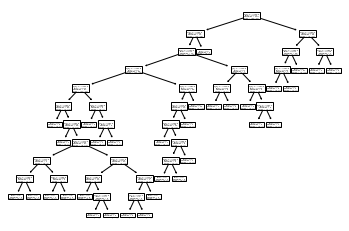

In [28]:
#Mostramos como sería el árbol resultante
tree.plot_tree(clf) 

In [29]:
#El método predict nos permite predecir las etiquetas de los valores de los datos sobre la base del modelo entrenado.
pred = clf.predict(atributos)

In [30]:
from sklearn import metrics
#Finalmente obtenemos la exactitud
print("Accuracy:", metrics.accuracy_score(objetivo,pred))

Accuracy: 0.9831932773109243


RELACIONAL

In [31]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(atributos_relacional, objetivo_relacional)

[Text(235.94741379310344, 209.6742857142857, 'X[1] <= 1706.0\ngini = 0.301\nsamples = 119\nvalue = [22, 97]'),
 Text(183.2741379310345, 194.14285714285714, 'X[0] <= 1655.5\ngini = 0.382\nsamples = 74\nvalue = [19, 55]'),
 Text(171.72931034482758, 178.61142857142858, 'X[1] <= 1700.5\ngini = 0.361\nsamples = 72\nvalue = [17, 55]'),
 Text(135.65172413793104, 163.07999999999998, 'X[4] <= 0.038\ngini = 0.32\nsamples = 65\nvalue = [13, 52]'),
 Text(124.10689655172413, 147.54857142857142, 'X[6] <= 0.016\ngini = 0.375\nsamples = 52\nvalue = [13, 39]'),
 Text(86.58620689655172, 132.01714285714286, 'X[1] <= 1680.0\ngini = 0.335\nsamples = 47\nvalue = [10, 37]'),
 Text(46.179310344827584, 116.48571428571428, 'X[2] <= 10002161.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(34.63448275862069, 100.9542857142857, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(57.72413793103448, 100.9542857142857, 'X[2] <= 10003727.0\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(34.63448275862069, 

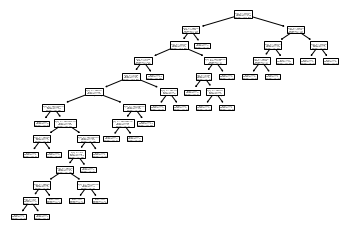

In [32]:
tree.plot_tree(clf2) 

In [33]:
pred2 = clf2.predict(atributos_relacional)

In [34]:
print("Accuracy:", metrics.accuracy_score(objetivo_relacional,pred2))

Accuracy: 1.0


In [35]:
#Hacemos exactamente lo mismo que para los datos relacionales y obtenemos el acuraci que vemos que mejora.
#Por tanto el modelo relacional nos aporta un mayor rendimiento.

REDES NEURONALES

In [36]:
from tensorflow import keras

In [37]:
atributos = atributos.to_numpy()
print(atributos)

[[1663 1731]
 [1621 1694]
 [1674 1751]
 [1656 1659]
 [1626 1697]
 [1630 1713]
 [1630 1691]
 [1621 1688]
 [1630 1664]
 [1649 1723]
 [1663 1752]
 [1687 1750]
 [1654 1725]
 [1637 1704]
 [1551 1661]
 [1624 1691]
 [1618 1675]
 [1627 1705]
 [1605 1657]
 [1640 1708]
 [1618 1692]
 [1683 1761]
 [1631 1704]
 [1633 1720]
 [1569 1679]
 [1628 1692]
 [1634 1687]
 [1626 1666]
 [1665 1745]
 [1620 1679]
 [1627 1713]
 [1673 1738]
 [1616 1699]
 [1626 1705]
 [1635 1681]
 [1683 1757]
 [1618 1660]
 [1562 1672]
 [1637 1724]
 [1630 1696]
 [1628 1711]
 [1636 1714]
 [1691 1765]
 [1607 1679]
 [1656 1722]
 [1614 1686]
 [1630 1691]
 [1630 1666]
 [1601 1678]
 [1617 1682]
 [1590 1700]
 [1648 1690]
 [1631 1711]
 [1666 1749]
 [1624 1701]
 [1614 1702]
 [1558 1668]
 [1555 1665]
 [1602 1712]
 [1619 1679]
 [1628 1689]
 [1652 1683]
 [1616 1660]
 [1610 1686]
 [1682 1769]
 [1666 1743]
 [1638 1716]
 [1636 1656]
 [1694 1768]
 [1614 1698]
 [1636 1665]
 [1618 1669]
 [1628 1662]
 [1552 1662]
 [1601 1711]
 [1671 1735]
 [1643 1707]

In [38]:
objetivo = quakers['gender'] == 'male'
objetivo = objetivo.to_numpy().astype(float)
print(objetivo)
#El objetivo tras aplicarle el método numpy nos aseguramos de que esté en tipo float

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


In [39]:
normalizador = keras.layers.experimental.preprocessing.Normalization()
#El normalizador es una capa de normalización tras la capa de entrada para tipificar las variables.
normalizador.adapt(atributos)

In [57]:
red_quakers = keras.Sequential()
#Creamos la secuencia que necesitamso
red_quakers.add(keras.Input(shape=(1,)))
#Creamos la capa de entrada
red_quakers.add(normalizador)
#Creamos la capa de normalización
red_quakers.add(keras.layers.Dense(2, activation='softmax'))
#Aplicar la cantidad de capas neuronas y función de activación.
red_quakers.summary()
#Con summary obtenemos un resumen de nustro modelo.
#El numero de parámetros no entrenables son los que permanecen igual durante el entrenamiento (mismo peso).

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 11
Trainable params: 6
Non-trainable params: 5
_________________________________________________________________


In [58]:
red_quakers.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
#Para entrenar una red neuronal hay que compilarla primero, estableciendo el algoritmo de aprendizaje (optimizer) 
#y la función de pérdida (loss) a minimizar
#Compilamos aplicando la validación cruzada en el loss que es la función de pérdida a minimizar y como métrica le ponemos la
#exactitud
#SGD: algoritmo del descenso estocástico por el gradiente (stochastic gradient descent, SGD).

In [59]:
objetivo = quakers['gender']
objetivo = pandas.get_dummies(objetivo)
objetivo = objetivo.to_numpy()
print(objetivo)
#Adaptamos el objetivo

[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [60]:
red_quakers.fit(atributos, objetivo,
               batch_size=300, epochs=10)  
#batch: cada uno de los subconjuntos
#epochs: numero de pasos para completar el entrenamiento hasta que el algoritmo acabe
#Los lotes se construyen repartiendo aleatoriamente los ejemplos de entrenamiento y cuando se han considerado todos los lotes 
#(y, en consecuencia, todos los ejemplos) se dice que ha transcurrido una época (epoch).

Epoch 1/10
1/1 [==============================] - 1s 507ms/step - loss: 0.7169 - accuracy: 0.4874
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7163 - accuracy: 0.4874
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.4874
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.4874
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.4874
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7139 - accuracy: 0.4874
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.4874
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7127 - accuracy: 0.4874
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7121 - accuracy: 0.4874
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.4622


RELACIONAL

In [44]:
atributos_relacional = atributos_relacional.to_numpy()
print(atributos_relacional)

[[1.66300000e+03 1.73100000e+03 1.00131910e+07 1.00000000e+00
  8.47457627e-03 0.00000000e+00 0.00000000e+00]
 [1.62100000e+03 1.69400000e+03 1.00111490e+07 1.00000000e+00
  8.47457627e-03 0.00000000e+00 0.00000000e+00]
 [1.67400000e+03 1.75100000e+03 1.00075670e+07 4.00000000e+00
  3.38983051e-02 3.33333333e-01 2.69448066e-02]
 [1.65600000e+03 1.65900000e+03 1.00039830e+07 1.00000000e+00
  8.47457627e-03 0.00000000e+00 0.00000000e+00]
 [1.62600000e+03 1.69700000e+03 1.00111520e+07 1.00000000e+00
  8.47457627e-03 0.00000000e+00 0.00000000e+00]
 [1.63000000e+03 1.71300000e+03 1.00085950e+07 1.00000000e+00
  8.47457627e-03 0.00000000e+00 0.00000000e+00]
 [1.63000000e+03 1.69100000e+03 1.00106430e+07 2.00000000e+00
  1.69491525e-02 1.00000000e+00 0.00000000e+00]
 [1.62100000e+03 1.68800000e+03 1.00034780e+07 3.00000000e+00
  2.54237288e-02 1.00000000e+00 0.00000000e+00]
 [1.63000000e+03 1.66400000e+03 1.00004110e+07 6.00000000e+00
  5.08474576e-02 2.00000000e-01 4.16493634e-02]
 [1.649000

In [45]:
objetivo_relacional = quakers_relacional['gender']=='male'
objetivo_relacional = objetivo_relacional.to_numpy().astype(float)
print(objetivo_relacional)
normalizador_r = keras.layers.experimental.preprocessing.Normalization()
normalizador_r.adapt(atributos_relacional)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


In [46]:
red_quakers_r = keras.Sequential()
red_quakers_r.add(keras.Input(shape=(1,)))
red_quakers_r.add(normalizador_r)
#red_quakers.add(keras.layers.Dense(2, activation='sigmoid'))
red_quakers_r.add(keras.layers.Dense(2, activation='softmax'))
red_quakers_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 7)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 16        
Total params: 31
Trainable params: 16
Non-trainable params: 15
_________________________________________________________________


In [47]:
red_quakers_r.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
objetivo_relacional = quakers_relacional['gender']
objetivo_relacional = pandas.get_dummies(objetivo_relacional)
objetivo_relacional = objetivo_relacional.to_numpy()
print(objetivo_relacional)

[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [49]:
red_quakers_r.fit(atributos_relacional, objetivo_relacional,
               batch_size=300, epochs=10) 

Epoch 1/10
1/1 [==============================] - 1s 547ms/step - loss: 0.8090 - accuracy: 0.5378
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8081 - accuracy: 0.5378
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8073 - accuracy: 0.5378
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8064 - accuracy: 0.5378
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.5378
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8047 - accuracy: 0.5462
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8039 - accuracy: 0.5462
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.5462
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8022 - accuracy: 0.5462
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.8013 - accuracy: 0.5462


In [50]:
#Con el modelo relacional realizamos los mismos pasos que anteriormente.
#Vemos que en este caso con el modelo relaxional la exactitud empeora al añadir las propiedades relacionales.
#Seguramente sea porque el algoritmo necesite un mayor entrenamiento aumentando el número de capas y neuronas para obtener un
#resultado similar a los demás modelos aplicados.

RANDOM FOREST

In [51]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [52]:
#Creamos un clasificador corresponiente con random forest
clf = RandomForestClassifier()

In [53]:
#Usamos validación cruzada para obtener el score
scores = cross_val_score(clf, atributos, objetivo, cv=10)
print('Scores =', scores)
print(max(scores))
#De las exactitudes obtenidas nos quedamos con el valor más grande

Scores = [0.83333333 0.58333333 0.66666667 0.91666667 0.58333333 0.75
 0.66666667 0.83333333 0.66666667 0.63636364]
0.9166666666666666


RELACIONAL

In [54]:
clf_r = RandomForestClassifier()

In [55]:
scores_r = cross_val_score(clf_r, atributos_relacional, objetivo_relacional, cv=10)
print('Scores =', scores_r)
print(max(scores_r))

Scores = [0.91666667 0.58333333 0.91666667 0.91666667 0.66666667 1.
 0.66666667 0.83333333 0.58333333 0.72727273]
1.0


In [56]:
#Vemos también que la exactitud es mayor en modelo relacional por tanto significa que al añadir las propiedades relacionales 
#al modelo mejora su exactitud.